### Mask-RCNN DataLoader. Common objects in context COCO dataset

In [ ]:
import os
import matplotlib.pyplot as plt
os.chdir('..')

from samples.coco import coco
from preprocess import preprocess
from preprocess import augmentation as aug

%matplotlib inline

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions

In [ ]:
base_dir = r'/media/alexander/Samsung_T5/temp/coco2017'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
from common.config import CONFIG

In [ ]:
CONFIG.update(coco.COCO_CONFIG)
CONFIG

In [ ]:
train_dataset = coco.CocoDataset(dataset_dir=train_dir,
                                 subset='train',
                                 year=2017,
                                 auto_download=False,
                               
                                 # SegmentationDataset necessary parent attributes
                                 augmentation=aug.get_training_augmentation(
                                               image_size=CONFIG['img_size'],
                                               normalize=CONFIG['normalization']
                                 ),
                                 **CONFIG
                                )

val_dataset = coco.CocoDataset(dataset_dir=val_dir,
                               subset='val',
                               year=2017,
                               auto_download=False,
                               
                               # SegmentationDataset necessary parent attributes
                               augmentation=aug.get_validation_augmentation(
                                           image_size=CONFIG['img_size'],
                                           normalize=CONFIG['normalization']
                               ),
                               **CONFIG
                              )

train_dataloader = preprocess.DataLoader(train_dataset,
                                         shuffle=True,
                                         name='train',
                                         **CONFIG
                                        )
val_dataloader = preprocess.DataLoader(val_dataset,
                                       shuffle=False,
                                       name='val',
                                       **CONFIG
                                      )

Create data generators for training and validation

In [7]:
train_iterated = iter(train_dataloader)
val_iterated = iter(val_dataloader)

In [8]:
train_batch = next(train_iterated)

In [9]:
for x in train_batch[0]:
    print(x.shape)

(1, 512, 512, 3)
(1, 93)
(1, 65472, 1)
(1, 256, 4)
(1, 100)
(1, 100, 4)
(1, 512, 512, 100)


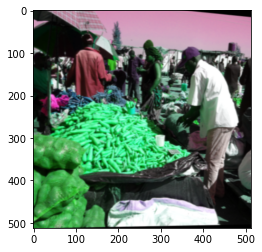

In [10]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][0][i])

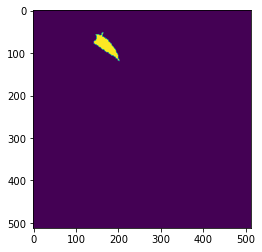

In [11]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][6][i][:, :, 0])

In [12]:
val_batch = next(val_iterated)

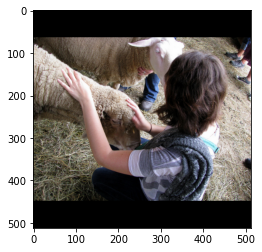

In [13]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][0][i])

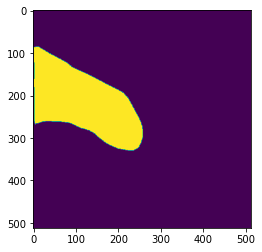

In [14]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][6][i][:, :, 0])